# 라이브러리

In [5]:
# 라이브러리 불러오기
import json
import operator
import pandas as pd
from datetime import datetime, timedelta
import re
from collections import Counter
import seaborn as sns
from matplotlib.dates import DateFormatter
import numpy as np

In [6]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.patches as mpatches

In [7]:
import os

# os.chdir('/content/drive/MyDrive/취업준비/오늘의집/원본데이터')
os.chdir(r'G:\내 드라이브\취업준비\오늘의집\원본데이터')

# 1. 인테리어 산업 현황

##  1) 인테리어 산업 매출

In [8]:
interior_sales = pd.read_excel('인테리어업체매출액.xlsx')

In [9]:
interior_sales

,시점,매출액평균
0,2018,25233.91
1,2019,14341.49
2,2020,12154.99
3,2021,7696.10


<Axes: xlabel='시점'>

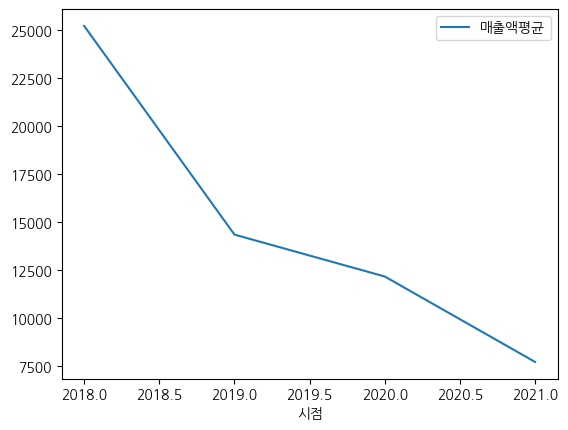

In [10]:
interior_sales.plot(x = '시점', y = '매출액평균') # 출처 : 국가통계 포털

# 2. 가구형태 분석

## 1) 가구원수 변화

In [11]:
type_furniture = pd.read_excel('가구원수별.xlsx')

In [12]:
type_furniture.head()

,시점,행정구역별(읍면동),1인,2인,3인,4인,5인이상
0,2018,전국,5848594,5445691,4203792,3396320,1084791
1,2018,수원시,129612,102460,99659,93215,25873
2,2018,성남시,102895,89725,80343,66930,19429
3,2018,고양시,84595,95810,90501,76881,22321
4,2018,용인시,75360,87774,86908,81154,24771


In [13]:
grouped_data = type_furniture.melt(id_vars = ['시점', '행정구역별(읍면동)'], var_name = '가구원수', value_name = '가구수')
grouped_data.head()

,시점,행정구역별(읍면동),가구원수,가구수
0,2018,전국,1인,5848594
1,2018,수원시,1인,129612
2,2018,성남시,1인,102895
3,2018,고양시,1인,84595
4,2018,용인시,1인,75360


In [14]:
grouped_data_nation = grouped_data[grouped_data['행정구역별(읍면동)'] == '전국']
grouped_data_nation.head()

,시점,행정구역별(읍면동),가구원수,가구수
0,2018,전국,1인,5848594
6,2019,전국,1인,6147516
12,2020,전국,1인,6643354
18,2021,전국,1인,7165788
24,2022,전국,1인,7502350


In [15]:
grouped_data_nation.pivot_table(index = '시점', columns='가구원수', values='가구수', aggfunc = np.mean)

C:\Users\xlnt\AppData\Local\Temp\ipykernel_45904\740802997.py:1: FutureWarning: The provided callable <function mean at 0x0000024DAEF3D8B0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data_nation.pivot_table(index = '시점', columns='가구원수', values='가구수', aggfunc = np.mean)


가구원수,1인,2인,3인,4인,5인이상
시점,,,,,
2018,5848594.0,5445691.0,4203792.0,3396320.0,1084791.0
2019,6147516.0,5663330.0,4217736.0,3300114.0,1014492.0
2020,6643354.0,5864525.0,4200629.0,3271315.0,946887.0
2021,7165788.0,6076549.0,4169956.0,3154286.0,881884.0
2022,7502350.0,6260692.0,4184540.0,3010697.0,815228.0


In [16]:
# 2017년 대비 증감률
grouped_data_nation_inde = pd.read_excel('가구형태/가구원수별_2017_대비_증감률.xlsx')
grouped_data_nation_inde

,시점,1인,2인,3인,4인,5인이상
0,2018,4.1,3.5,0.6,-2.2,-21.2
1,2019,9.4,7.7,0.9,-5.0,-45.3
2,2020,18.2,11.5,0.5,-5.8,-73.9
3,2021,27.5,15.5,-0.2,-9.2,-95.0
4,2022,33.5,19.0,0.1,-13.3,-112.8


- 1인가구와 2인가구의 상승

## 2) 가구형태 변화

In [17]:
Age_Household_Type = pd.read_excel('가구형태/가구주의_성__연령_및_세대구성별_가구_일반가구.xlsx')

In [18]:
# 친인척, 1인가구, 비친인척 나누기
Age_Household_Type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   시점                      80 non-null     int64  
 1   가구주의 연령별                80 non-null     object 
 2   일반가구                    80 non-null     int64  
 3   1세대가구-계                 80 non-null     int64  
 4   1세대가구-부부                75 non-null     float64
 5   1세대가구-부부+미혼형제자매         70 non-null     float64
 6   1세대가구-부부+기타친인척          66 non-null     float64
 7   1세대가구-가구주+미혼형제자매        80 non-null     int64  
 8   1세대가구-가구주+기타친인척         75 non-null     float64
 9   1세대가구-기타                75 non-null     float64
 10  2세대가구-계                 76 non-null     float64
 11  2세대가구-부부+미혼자녀           75 non-null     float64
 12  2세대가구-부+미혼자녀            75 non-null     float64
 13  2세대가구-모+미혼자녀            75 non-null     float64
 14  2세대가구-부부+양친             69 non-null     floa

In [19]:
Age_Household_Type.drop(columns='일반가구', axis = 1, inplace=True)

In [20]:
# Select columns to concatenate horizontally
columns_to_concat = Age_Household_Type.iloc[:, [2, 9, 19, 24]]

# Sum along the columns (axis=1 for horizontal sum)
result = columns_to_concat.sum(axis=1)

# Assign the result to a new column '가족' in Age_Household_Type DataFrame
Age_Household_Type['가족'] = result

In [21]:
Age_Household_Type_melt = Age_Household_Type.iloc[:, [0, 1, 25, 26, 27]].melt(id_vars = ['시점', '가구주의 연령별'], value_vars=['비친족가구', '가족'], var_name='가구형태', value_name='가구수')
Age_Household_Type_melt

,시점,가구주의 연령별,가구형태,가구수
0,2018,15세미만,비친족가구,30.0
1,2018,15~19세,비친족가구,624.0
2,2018,20~24세,비친족가구,15014.0
3,2018,25~29세,비친족가구,44425.0
4,2018,30~34세,비친족가구,42596.0
...,...,...,...,...
155,2022,65~69세,가족,1211917.0
156,2022,70~74세,가족,848984.0
157,2022,75~79세,가족,602331.0
158,2022,80~84세,가족,423931.0


In [22]:
Age_Household_Type_melt_pivot = Age_Household_Type_melt.pivot_table(index = '시점', columns = '가구형태', values='가구수', aggfunc = np.sum)
Age_Household_Type_melt_pivot

C:\Users\xlnt\AppData\Local\Temp\ipykernel_45904\2796142671.py:1: FutureWarning: The provided callable <function sum at 0x0000024DAEF37940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Age_Household_Type_melt_pivot = Age_Household_Type_melt.pivot_table(index = '시점', columns = '가구형태', values='가구수', aggfunc = np.sum)


가구형태,가족,비친족가구
시점,,
2018,13790227.0,340367.0
2019,13808704.0,386968.0
2020,13859896.0,423459.0
2021,13810014.0,472660.0
2022,13757267.0,513889.0


In [23]:
Age_Household_Type_melt_pivot['가족_비율'] = ((Age_Household_Type_melt_pivot['가족'] - Age_Household_Type_melt_pivot['가족'].iloc[0]) / Age_Household_Type_melt_pivot['가족'].iloc[0]) * 100
Age_Household_Type_melt_pivot['비친족가구_비율'] = ((Age_Household_Type_melt_pivot['비친족가구'] - Age_Household_Type_melt_pivot['비친족가구'].iloc[0]) / Age_Household_Type_melt_pivot['비친족가구'].iloc[0]) * 100

In [24]:
# 2018년 대비 증감률
Age_Household_Type_melt_pivot.iloc[1:, 2:]

가구형태,가족_비율,비친족가구_비율
시점,,
2019,0.133986,13.691398
2020,0.505206,24.412472
2021,0.143486,38.867752
2022,-0.239010,50.980853


In [25]:
# 2017년 대비 증감률
Age_Household_Type_inde = pd.read_excel('가구형태/가구주의_성__연령_및_세대구성별_가구_일반가구_2017_대비_증감률.xlsx')

In [26]:
Age_Household_Type_inde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   시점                     80 non-null     int64  
 1   가구주의 연령별               80 non-null     object 
 2   일반가구                   80 non-null     float64
 3   1세대가구계                 80 non-null     float64
 4   1세대가구부부                75 non-null     float64
 5   1세대가구부부+미혼형제자매         70 non-null     float64
 6   1세대가구부부+기타친인척          66 non-null     float64
 7   1세대가구가구주+미혼형제자매        80 non-null     float64
 8   1세대가구가구주+기타친인척         75 non-null     float64
 9   1세대가구기타                75 non-null     float64
 10  2세대가구계                 75 non-null     float64
 11  2세대가구부부+미혼자녀           75 non-null     float64
 12  2세대가구부+미혼자녀            75 non-null     float64
 13  2세대가구모+미혼자녀            75 non-null     float64
 14  2세대가구부부+양친             69 non-null     float64
 15  2세대가구부부+

In [27]:
Age_Household_Type_inde.drop(columns='일반가구', axis = 1, inplace=True)

In [28]:
# Select columns to concatenate horizontally
columns_to_concat = Age_Household_Type_inde.iloc[:, [2, 9, 19, 24]]

# Sum along the columns (axis=1 for horizontal sum)
result = columns_to_concat.sum(axis=1)

# Assign the result to a new column '가족' in Age_Household_Type DataFrame
Age_Household_Type_inde['가족'] = result

In [29]:
Age_Household_Type_inde_melt = Age_Household_Type_inde.iloc[:, [0, 1, 25, 26, 27]].melt(id_vars = ['시점', '가구주의 연령별'], value_vars=['비친족가구', '가족'], var_name='가구형태', value_name='증감률')
Age_Household_Type_inde_melt

,시점,가구주의 연령별,가구형태,증감률
0,2018,15세미만,비친족가구,200.0
1,2018,15~19세,비친족가구,13.5
2,2018,20~24세,비친족가구,3.1
3,2018,25~29세,비친족가구,12.7
4,2018,30~34세,비친족가구,8.2
...,...,...,...,...
155,2022,65~69세,가족,136.7
156,2022,70~74세,가족,124.0
157,2022,75~79세,가족,114.1
158,2022,80~84세,가족,165.5


In [30]:
Age_Household_Type_inde_melt.pivot_table(index = '시점', columns = '가구형태', values='증감률', aggfunc = np.mean)

C:\Users\xlnt\AppData\Local\Temp\ipykernel_45904\1559849141.py:1: FutureWarning: The provided callable <function mean at 0x0000024DAEF3D8B0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Age_Household_Type_inde_melt.pivot_table(index = '시점', columns = '가구형태', values='증감률', aggfunc = np.mean)


가구형태,가족,비친족가구
시점,,
2018,25.69375,23.08125
2019,50.45625,43.05625
2020,79.33750,58.68125
2021,103.83125,77.47500
2022,125.73125,86.64375


- 위 결과 비친족, 2인 가구가 상승하고 있음을 알 수 있음.

## 3) 비친족가구 분석

In [31]:
# 비친족가구만 분리
Age_Household_Type_nof = Age_Household_Type_melt[Age_Household_Type_inde_melt.가구형태 == '비친족가구']
Age_Household_Type_nof

,시점,가구주의 연령별,가구형태,가구수
0,2018,15세미만,비친족가구,30.0
1,2018,15~19세,비친족가구,624.0
2,2018,20~24세,비친족가구,15014.0
3,2018,25~29세,비친족가구,44425.0
4,2018,30~34세,비친족가구,42596.0
...,...,...,...,...
75,2022,65~69세,비친족가구,20972.0
76,2022,70~74세,비친족가구,13876.0
77,2022,75~79세,비친족가구,9771.0
78,2022,80~84세,비친족가구,8276.0


In [32]:
Age_Household_Type_nof.pivot_table(index = '시점', columns = '가구주의 연령별', values='가구수', aggfunc = np.mean)

C:\Users\xlnt\AppData\Local\Temp\ipykernel_45904\3936128202.py:1: FutureWarning: The provided callable <function mean at 0x0000024DAEF3D8B0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Age_Household_Type_nof.pivot_table(index = '시점', columns = '가구주의 연령별', values='가구수', aggfunc = np.mean)


가구주의 연령별,15~19세,15세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세 이상
시점,,,,,,,,,,,,,,,,
2018,624.0,30.0,15014.0,44425.0,42596.0,35423.0,28262.0,32649.0,32595.0,38463.0,34339.0,10480.0,8026.0,7309.0,5477.0,4655.0
2019,663.0,36.0,15645.0,51427.0,48235.0,38468.0,30545.0,35209.0,37760.0,43295.0,41593.0,12810.0,9837.0,8478.0,6742.0,6225.0
2020,555.0,48.0,16890.0,58610.0,57985.0,42037.0,33284.0,36305.0,39930.0,44425.0,45219.0,15383.0,11010.0,8858.0,7033.0,5887.0
2021,581.0,56.0,18116.0,65658.0,71381.0,47223.0,38012.0,37152.0,43640.0,46393.0,50428.0,18499.0,12339.0,9256.0,7389.0,6537.0
2022,585.0,51.0,18731.0,69257.0,85510.0,52153.0,41552.0,38583.0,46416.0,47793.0,53251.0,20972.0,13876.0,9771.0,8276.0,7112.0


In [33]:
Age_Household_Type_inde_nof = Age_Household_Type_inde_melt[Age_Household_Type_inde_melt.가구형태 == '비친족가구']
Age_Household_Type_inde_nof

,시점,가구주의 연령별,가구형태,증감률
0,2018,15세미만,비친족가구,200.0
1,2018,15~19세,비친족가구,13.5
2,2018,20~24세,비친족가구,3.1
3,2018,25~29세,비친족가구,12.7
4,2018,30~34세,비친족가구,8.2
...,...,...,...,...
75,2022,65~69세,비친족가구,134.3
76,2022,70~74세,비친족가구,104.3
77,2022,75~79세,비친족가구,51.7
78,2022,80~84세,비친족가구,72.0


In [34]:
Age_Household_Type_inde_nof.pivot_table(index = '시점', columns = '가구주의 연령별', values='증감률', aggfunc = np.mean)

C:\Users\xlnt\AppData\Local\Temp\ipykernel_45904\1156601402.py:1: FutureWarning: The provided callable <function mean at 0x0000024DAEF3D8B0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Age_Household_Type_inde_nof.pivot_table(index = '시점', columns = '가구주의 연령별', values='증감률', aggfunc = np.mean)


가구주의 연령별,15~19세,15세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세 이상
시점,,,,,,,,,,,,,,,,
2018,13.5,200.0,3.1,12.7,8.2,12.2,5.5,7.7,9.1,8.1,16.9,17.1,18.2,13.5,13.8,9.7
2019,20.5,260.0,7.5,30.5,22.5,21.8,14.0,16.1,26.4,21.7,41.6,43.1,44.8,31.6,40.1,46.7
2020,0.9,380.0,16.0,48.7,47.3,33.1,24.2,19.7,33.7,24.9,54.0,71.9,62.1,37.5,46.2,38.7
2021,5.6,460.0,24.4,66.6,81.3,49.5,41.8,22.5,46.1,30.4,71.7,106.7,81.7,43.7,53.6,54.0
2022,6.4,410.0,28.7,75.7,117.2,65.1,55.0,27.2,55.4,34.4,81.3,134.3,104.3,51.7,72.0,67.6


- 25세에서 39세 사이에서 높은 증가율을 보여줌

## 4) 2030이 가장 많이 소유 하고 있는 면적

In [35]:
Age_House_Square_Footage = pd.read_excel('주택면적_연령대별_주택소유자수.xlsx')

In [36]:
# category_mapping = {
#     "시점" : "시점",
#     "연령대별" : "연령대별",
#     "12평 이하" : "12평 이하",
#     "12평 초과 18평 이하" : "12평 초과 18평 이하",
#     "18평 초과 30평 이하": "18평 초과",
#     "30평 초과 50평 이하": "18평 초과",
#     "50평 초과": "18평 초과"
# }

# Age_House_Square_Footage = Age_House_Square_Footage.rename(columns=category_mapping)

In [37]:
#  '연령대별' 칼럼에서 '29세이하', '30~39세' 값의 행 추출
Age_House_Square_Footage_2030 = Age_House_Square_Footage[Age_House_Square_Footage['연령대별'].isin(['29세이하', '30~39세'])]

In [38]:
Age_House_Square_Footage_2030.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 43
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   시점             14 non-null     int64 
 1   연령대별           14 non-null     object
 2   12평 이하         14 non-null     int64 
 3   12평 초과 18평 이하  14 non-null     int64 
 4   18평 초과 30평 이하  14 non-null     int64 
 5   30평 초과 50평 이하  14 non-null     int64 
 6   50평 초과         14 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 896.0+ bytes


In [39]:
# Age_House_Square_Footage['test'] = np.sum(Age_House_Square_Footage.iloc[:,4:], axis = 1)

In [40]:
Age_House_Square_Footage_2030 = Age_House_Square_Footage_2030[Age_House_Square_Footage_2030.시점 > 2017]

In [41]:
Age_House_Square_Footage_2030.sort_values(by = '연령대별')

,시점,연령대별,12평 이하,12평 초과 18평 이하,18평 초과 30평 이하,30평 초과 50평 이하,50평 초과
14,2018,29세이하,31985,102392,95191,19453,8271
21,2019,29세이하,30386,96411,96293,19017,8255
28,2020,29세이하,32534,100910,102367,20842,8659
35,2021,29세이하,37630,111693,110663,22459,9051
42,2022,29세이하,37936,103627,102233,21296,8970
15,2018,30~39세,103545,601730,900738,151259,44378
22,2019,30~39세,95369,562212,902732,139913,41323
29,2020,30~39세,88644,524633,889437,139119,38551
36,2021,30~39세,85904,508698,877589,137801,36745
43,2022,30~39세,84560,483270,815004,124163,34375


20대는 12 ~ 30평, 30대는 18 ~ 30평 사이의 집을 선호함

- 주택종류 : 아파트
- 면적 : 18평 초과
- 아파트 연식 : 2년~4년
- 타겟층 : 4060

2월과 3월에 전입 인구가 가장 많음

## 5) 주거선택 이유

In [42]:
Reasons_residence = pd.read_excel('현재_거주_중인_주택_선택_이유.xlsx')

In [43]:
Reasons_residence.iloc[1:, :]

,연령별,"주거비용(매매가격, 전월세가격 등)","주택유형(아파트, 다세대/빌라, 원룸(다가구), 오피스텔 등)","주택상태(주택규모, 노후도, 방의 개수, 인테리어 등)","주택위치(직장/학교와의 거리, 부모님 집과의 거리)","주거환경(의료/문화/상업시설/도시공원 및 녹지 접근성, 교통, 교육환경 등)",향후 주택 가격 변화(미래 자산가치 상승 기대),기타
1,만25-29세,25.5,16.5,5.4,35.8,12.9,2.8,1.1
2,만30-34세,31.1,17.7,4.8,29.9,11.9,3.3,1.3


2020년 조사 결과 이들은 주택위치, 주거비용 순으로 주택을 선택함  -> 인테리어 관심도가 낮음(?)

## 6) 건축 연도 및 **평수**

In [44]:
year_construction = pd.read_excel('노후건물/주택의_종류__연면적_및_건축연도별_주택.xlsx')

In [45]:
year_construction.연면적별.unique()

array(['합계', '20㎡ 이하', '20㎡ ~ 40㎡', '40㎡ ~ 60㎡', '60㎡ ~ 85㎡',
       '85㎡ ~ 100㎡', '100㎡ ~ 130㎡', '130㎡ ~ 165㎡', '165㎡ ~ 230㎡',
       '230㎡ 초과'], dtype=object)

In [46]:
category_mapping = {
    "합계": "합계",
    "20㎡ 이하": "12평 이하",
    "20㎡ ~ 40㎡": "12평 이하",
    "40㎡ ~ 60㎡": "12평 초과 18평 이하",
    "60㎡ ~ 85㎡": "18평 초과",
    "85㎡ ~ 100㎡": "18평 초과",
    "100㎡ ~ 130㎡": "18평 초과",
    "130㎡ ~ 165㎡": "18평 초과",
    "165㎡ ~ 230㎡": "18평 초과",
    "230㎡ 초과": "18평 초과"
}

year_construction['연면적별'] = year_construction['연면적별'].map(category_mapping)

In [47]:
# Define the mapping for decades
decade_mapping = {
    '주택_계': None,
    2010.0: '2010년대', 2011.0: '2010년대', 2012.0: '2010년대', 2013.0: '2010년대', 2014.0: '2010년대',
    2015.0: '2010년대', 2016.0: '2010년대', 2017.0: '2010년대', 2018.0: '2010년대', 2019.0: '2010년대',
    2020.0: '2020년대', 2021.0: '2020년대', 2022.0: '2020년대',
    ' 2005~2009': '2000년대', ' 2000~2004': '2000년대',
    ' 1990~1999': '1990년대',
    ' 1980~1989': '1980년대',
    ' 1979 이전': '1979년 이전'
}
year_construction_2 = year_construction.copy()
# Apply the mapping to the '건축연도' column
year_construction_2['건축연도'] = year_construction['건축연도'].map(decade_mapping)

# Display the modified data
year_construction_2.head()

,시점,연면적별,건축연도,단독주택,아파트,연립주택,다세대주택
0,2018,합계,None,3948984,10826044.0,508664.0,2139885.0
1,2018,합계,2010년대,48037,358266.0,10104.0,62718.0
2,2018,합계,2010년대,63564,391072.0,16369.0,92959.0
3,2018,합계,2010년대,64804,334863.0,14227.0,113383.0
4,2018,합계,2010년대,60977,313371.0,11601.0,98238.0


In [48]:
year_construction_22 = year_construction_2[year_construction['시점'] == 2022]
year_construction_22 = year_construction_22[year_construction_22.연면적별 == '12평 초과 18평 이하'].drop(717, axis = 0)
year_construction_22['총주택수'] = year_construction_22['단독주택'] + year_construction_22['아파트'] + year_construction_22['연립주택'] + year_construction_22['다세대주택']

In [49]:
year_construction_22_gb = pd.DataFrame(year_construction_22.groupby('건축연도')['총주택수'].sum())
year_construction_22_gb.sort_values(by = '총주택수', ascending=False)

,총주택수
건축연도,
1990년대,1946797.0
2000년대,1144207.0
2010년대,1036956.0
1980년대,597552.0
1979년 이전,438653.0
2020년대,287228.0


주거 선택 이유를 살펴봤을 때, 2030세대는 1990년대 낡은 건물을 선택할 확률이 높음

In [50]:
# # Filter the data for '12평 이하' apartments and exclude rows where '건축연도' is None
# filtered_small_apartments = year_construction_2[(year_construction_2['연면적별'] == '12평 이하') & (year_construction_2['건축연도'] != None)]

# # Group the filtered data by '시점' and '건축연도', then sum up the '아파트' column
# grouped_small_apartments = filtered_small_apartments.groupby(['시점', '건축연도'])['아파트'].sum().unstack(fill_value=0)

# # Display the grouped data
# grouped_small_apartments.head()

In [51]:
# # Calculate the year-over-year growth rate
# grouped_small_apartments_rate = grouped_small_apartments.pct_change() * 100

# # Display the result
# grouped_small_apartments_rate.head()
# # 12평 이하 아파트의 수요가 많이 늘어났음

# 타겟분석

## 1) 타겟 재산과 부채

In [52]:
finance = pd.read_excel('연령별_자산_부채_상환액.xlsx')

In [53]:
finance_2030 = finance[finance.분류.isin(['자산 (만원)', '부채 (만원)'])].iloc[:, :4]
finance_2030

,시점,분류,29세 이하,30~39세
0,2017,자산 (만원),9882,28824
1,2017,부채 (만원),2393,6920
3,2018,자산 (만원),9892,31503
4,2018,부채 (만원),2591,8088
6,2019,자산 (만원),10994,32638
7,2019,부채 (만원),3197,8915
9,2020,자산 (만원),10720,35467
10,2020,부채 (만원),3479,10082
12,2021,자산 (만원),12140,40017
13,2021,부채 (만원),3550,11190


In [54]:
assets = finance_2030[finance_2030['분류'].str.contains('자산')].reset_index()
debts = finance_2030[finance_2030['분류'].str.contains('부채')].reset_index()

In [55]:
assets = assets.fillna(0)
debts = debts.fillna(0)

# Calculate the debt-to-assets ratio
debts_per = debts.iloc[:, 3:] / assets.iloc[:, 3:] * 100

In [56]:
debts_per.round(1)

,29세 이하,30~39세
0,24.2,24.0
1,26.2,25.7
2,29.1,27.3
3,32.5,28.4
4,29.2,28.0
5,37.1,27.4


자산 대비 부채 비율이 높아지면서 주거 비용을 줄이고자 새로운 가구 형태를 선택했다고 봄

## 2) 소비 분석

In [57]:
Consumption_expenditure_amount = pd.read_excel('타겟분석/가구특성별_소비지출구간별_가구분포.xlsx', engine='openpyxl')

c:\Users\xlnt\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [58]:
Consumption_expenditure_amount.가구특성별.unique()

array(['전체', '(가구주 연령) 29세 이하', '(가구주 연령) 30-39세', '(가구원수) 2인'],
      dtype=object)

In [59]:
Consumption_expenditure_amount[Consumption_expenditure_amount.가구특성별.str.contains('29')]

,가구특성별,시점,전체,500만원 미만,"500~1,000만원 미만","1,000~1,500만원 미만","1,500~2,000만원 미만","2,000~3,000만원 미만","3,000~5,000만원 미만","5,000만원 이상"
6,(가구주 연령) 29세 이하,2017,100,3.5,12.8,30.5,26.6,21.7,4.8,0.2
7,(가구주 연령) 29세 이하,2018,100,0.6,12.8,24.4,25.3,29.0,7.2,0.8
8,(가구주 연령) 29세 이하,2019,100,0.7,7.7,23.4,27.6,27.6,12.2,0.8
9,(가구주 연령) 29세 이하,2020,100,0.4,8.0,23.1,28.4,29.4,9.6,1.0
10,(가구주 연령) 29세 이하,2021,100,0.8,6.1,23.6,26.8,32.2,9.7,0.9
11,(가구주 연령) 29세 이하,2022,100,0.2,8.2,23.6,27.6,28.5,11.0,0.9


In [60]:
Consumption_expenditure_amount[Consumption_expenditure_amount.가구특성별.str.contains('39')]

,가구특성별,시점,전체,500만원 미만,"500~1,000만원 미만","1,000~1,500만원 미만","1,500~2,000만원 미만","2,000~3,000만원 미만","3,000~5,000만원 미만","5,000만원 이상"
12,(가구주 연령) 30-39세,2017,100,0.8,4.4,13.4,17.8,34.9,25.0,3.7
13,(가구주 연령) 30-39세,2018,100,0.5,3.5,11.4,15.6,36.6,27.6,4.9
14,(가구주 연령) 30-39세,2019,100,0.2,3.0,8.6,16.2,35.3,30.8,6.0
15,(가구주 연령) 30-39세,2020,100,0.1,1.9,8.3,14.9,33.7,34.1,6.9
16,(가구주 연령) 30-39세,2021,100,0.1,2.4,8.3,15.2,33.5,33.3,7.2
17,(가구주 연령) 30-39세,2022,100,0.2,2.2,9.8,15.2,32.2,32.6,7.7


In [61]:
Consumption_expenditure_amount[Consumption_expenditure_amount.가구특성별.str.contains('2인')]

,가구특성별,시점,전체,500만원 미만,"500~1,000만원 미만","1,000~1,500만원 미만","1,500~2,000만원 미만","2,000~3,000만원 미만","3,000~5,000만원 미만","5,000만원 이상"
18,(가구원수) 2인,2017,100,4.0,19.6,26.2,19.7,20.6,8.2,1.7
19,(가구원수) 2인,2018,100,2.0,17.1,25.7,20.2,22.7,10.1,2.1
20,(가구원수) 2인,2019,100,1.1,14.7,22.8,21.8,25.3,11.9,2.3
21,(가구원수) 2인,2020,100,0.6,12.5,23.1,22.5,25.5,13.1,2.6
22,(가구원수) 2인,2021,100,0.4,9.3,22.1,22.9,28.8,14.0,2.5
23,(가구원수) 2인,2022,100,0.3,8.4,19.0,21.3,31.5,16.6,2.9


In [62]:
Age_specific_per_household_average_household_balance = pd.read_excel('타겟분석/가구주_연령별_가구당_월평균_가계수지_전국_2인이상.xlsx', engine='openpyxl')

c:\Users\xlnt\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [63]:
Age_specific_per_household_average_household_balance_39 = Age_specific_per_household_average_household_balance[Age_specific_per_household_average_household_balance.가구주연령별.str.contains('39세')]
Age_specific_per_household_average_household_balance_39.head()

,가구주연령별,시점,가계수지항목별,전체가구
72,39세이하가구,2019,가구원수 (명),3.22
73,39세이하가구,2019,가구주연령 (세),34.56
74,39세이하가구,2019,가구분포 (%),18.78
75,39세이하가구,2019,가계지출,4014008.00
76,39세이하가구,2019,소비지출,3039814.00


In [64]:
Age_specific_per_household_average_household_balance = pd.read_excel('타겟분석/가구주_연령별_가구당_월평균_가계수지_전국_2인이상.xlsx', engine='openpyxl')
Age_specific_per_household_average_household_balance_39 = Age_specific_per_household_average_household_balance[Age_specific_per_household_average_household_balance.가구주연령별.str.contains('39세')]
Age_specific_per_household_average_household_balance_cos = Age_specific_per_household_average_household_balance_39[Age_specific_per_household_average_household_balance_39.가계수지항목별 == '소비지출']
Age_specific_per_household_average_household_balance_39_top10 = Age_specific_per_household_average_household_balance_39[
    Age_specific_per_household_average_household_balance_39['가계수지항목별'].str.contains('0') |
    Age_specific_per_household_average_household_balance_39['가계수지항목별'].str.contains('1')
]
Age_specific_per_household_average_household_balance_39_top10_pivot = Age_specific_per_household_average_household_balance_39_top10.pivot_table(index = '시점', columns = '가계수지항목별', values='전체가구', aggfunc = np.sum)


# 품목별 소비자 물가지수
Consumer_Price_Index= pd.read_excel('타겟분석/지출목적별_소비자물가지수.xlsx', engine='openpyxl')
Consumer_Price_Index = Consumer_Price_Index.iloc[1:, :]
Consumer_Price_Index.set_index('시점', inplace=True)
columns_name = Age_specific_per_household_average_household_balance_39_top10_pivot.columns
columns_name = list(columns_name)
Consumer_Price_Index.columns = columns_name


c:\Users\xlnt\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\xlnt\AppData\Local\Temp\ipykernel_45904\3434226092.py:8: FutureWarning: The provided callable <function sum at 0x0000024DAEF37940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Age_specific_per_household_average_household_balance_39_top10_pivot = Age_specific_per_household_average_household_balance_39_top10.pivot_table(index = '시점', columns = '가계수지항목별', values='전체가구', aggfunc = np.sum)


In [65]:
Age_specific_per_household_average_household_balance_cos = Age_specific_per_household_average_household_balance_39[Age_specific_per_household_average_household_balance_39.가계수지항목별 == '소비지출']
Age_specific_per_household_average_household_balance_cos

,가구주연령별,시점,가계수지항목별,전체가구
76,39세이하가구,2019,소비지출,3039814.0
94,39세이하가구,2020,소비지출,3047327.0
112,39세이하가구,2021,소비지출,3139773.0
130,39세이하가구,2022,소비지출,3309957.0


In [66]:
Age_specific_per_household_average_household_balance_39_top10 = Age_specific_per_household_average_household_balance_39[
    Age_specific_per_household_average_household_balance_39['가계수지항목별'].str.contains('0') |
    Age_specific_per_household_average_household_balance_39['가계수지항목별'].str.contains('1')
]

In [67]:
Age_specific_per_household_average_household_balance_39_top10_pivot = Age_specific_per_household_average_household_balance_39_top10.pivot_table(index = '시점', columns = '가계수지항목별', values='전체가구', aggfunc = np.sum)
Age_specific_per_household_average_household_balance_39_top10_pivot

C:\Users\xlnt\AppData\Local\Temp\ipykernel_45904\4038576012.py:1: FutureWarning: The provided callable <function sum at 0x0000024DAEF37940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Age_specific_per_household_average_household_balance_39_top10_pivot = Age_specific_per_household_average_household_balance_39_top10.pivot_table(index = '시점', columns = '가계수지항목별', values='전체가구', aggfunc = np.sum)


가계수지항목별,01.식료품 · 비주류음료,02.주류 · 담배,03.의류 · 신발,04.주거 · 수도 · 광열,05.가정용품 · 가사서비스,06.보건,07.교통,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스
시점,,,,,,,,,,,,
2019,370057.0,42390.0,191478.0,291888.0,179688.0,202476.0,420708.0,148469.0,242650.0,201128.0,464994.0,283888.0
2020,427619.0,45496.0,172443.0,309385.0,202897.0,213134.0,437146.0,151208.0,214540.0,169764.0,433580.0,270116.0
2021,429815.0,46405.0,191547.0,303362.0,198512.0,240678.0,404959.0,162116.0,220727.0,198789.0,462520.0,280342.0
2022,411757.0,45575.0,201114.0,311837.0,181256.0,231612.0,465082.0,164540.0,256407.0,231842.0,532411.0,276524.0


In [68]:
# 품목별 소비자 물가지수
Consumer_Price_Index= pd.read_excel('타겟분석/지출목적별_소비자물가지수.xlsx', engine='openpyxl')

In [69]:
Consumer_Price_Index = Consumer_Price_Index.iloc[1:, :]
Consumer_Price_Index.set_index('시점', inplace=True)

In [70]:
columns_name = Age_specific_per_household_average_household_balance_39_top10_pivot.columns
columns_name = list(columns_name)
Consumer_Price_Index.columns = columns_name

In [71]:
type(columns_name)

list

In [72]:
Consumer_Price_Index

,01.식료품 · 비주류음료,02.주류 · 담배,03.의류 · 신발,04.주거 · 수도 · 광열,05.가정용품 · 가사서비스,06.보건,07.교통,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스
시점,,,,,,,,,,,,
2019,95.762,99.682,99.27,99.488,99.967,98.516,101.867,102.112,101.023,102.178,99.061,98.082
2020,100.000,100.000,100.00,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2021,105.890,100.430,100.56,101.630,101.870,99.920,106.330,99.100,100.430,100.870,102.730,102.000
2022,112.150,102.620,103.71,107.190,106.780,100.760,116.680,100.020,103.290,102.230,110.530,108.270


In [73]:
# 물가 조정된 가계 지출 데이터 계산
# 각 연도별로 소비자 물가지수를 사용하여 가계 지출 데이터를 물가로 조정
price_adjusted_expenses = Age_specific_per_household_average_household_balance_39_top10_pivot.copy()
for year in price_adjusted_expenses.index:
    price_index = Consumer_Price_Index.loc[year]
    price_adjusted_expenses.loc[year] = price_adjusted_expenses.loc[year] / price_index * 100

# 연도별 증감률 계산
growth_rate = price_adjusted_expenses.pct_change() * 100

# 결과 출력
growth_rate.dropna(inplace=True)  # 첫 번째 행(증감률을 계산할 수 없는 행) 제거
growth_rate

가계수지항목별,01.식료품 · 비주류음료,02.주류 · 담배,03.의류 · 신발,04.주거 · 수도 · 광열,05.가정용품 · 가사서비스,06.보건,07.교통,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스
시점,,,,,,,,,,,,
2020,10.657684,6.985899,-10.598520,5.451731,12.879015,3.701718,5.847171,3.995792,-10.680097,-13.755688,-7.631349,-6.676163
2021,-5.077400,1.561264,10.459868,-3.519399,-3.957196,13.013736,-12.877820,8.187592,2.443338,16.087305,3.839835,1.750766
2022,-9.548642,-3.884517,1.805579,-2.538269,-12.891203,-4.569120,4.659311,0.561656,12.948275,15.075647,6.987643,-7.074117


In [74]:
# 물가 조정된 가계 지출 데이터 계산
price_adjusted_expenses = Age_specific_per_household_average_household_balance_39_top10_pivot.copy()
for year in price_adjusted_expenses.index:
    price_index = Consumer_Price_Index.loc[year]
    price_adjusted_expenses.loc[year] = price_adjusted_expenses.loc[year] / price_index * 100

# 2019년 대비 증감률 계산
base_year = 2019
growth_rate_since_2019 = (price_adjusted_expenses.loc[base_year:] / price_adjusted_expenses.loc[base_year] - 1) * 100

# 결과 출력
growth_rate_since_2019.dropna(inplace=True)  # 필요한 경우 NaN 값 제거
growth_rate_since_2019

가계수지항목별,01.식료품 · 비주류음료,02.주류 · 담배,03.의류 · 신발,04.주거 · 수도 · 광열,05.가정용품 · 가사서비스,06.보건,07.교통,08.통신,09.오락 · 문화,10.교육,11.음식 · 숙박,12.기타상품 · 서비스
시점,,,,,,,,,,,,
2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020,10.657684,6.985899,-10.598520,5.451731,12.879015,3.701718,5.847171,3.995792,-10.680097,-13.755688,-7.631349,-6.676163
2021,5.039151,8.656232,-1.247243,1.740464,8.412171,17.197187,-7.783638,12.510544,-8.497710,0.118697,-4.084546,-5.042281
2022,-4.990661,4.435462,0.535816,-0.841983,-5.563462,11.842307,-3.486991,13.142466,3.350258,15.212239,2.617684,-11.759701


1. **인테리어 관련 품목의 변화**:
   - '주거, 수도, 광열': 2020년(5.45% 증가), 2021년(1.74% 증가), 2022년(0.84% 감소)
   - '가정용품 및 가사서비스': 2020년(12.88% 증가), 2021년(8.41% 증가), 2022년(5.56% 감소)
   - '기타 상품 및 서비스': 2020년(6.68% 감소), 2021년(5.04% 감소), 2022년(11.76% 감소)

2. **나머지 품목들의 변화**:
   - '식료품 및 비주류음료': 2020년(10.66% 증가), 2021년(5.04% 증가), 2022년(4.99% 감소)
   - '주류 및 담배': 2020년(6.99% 증가), 2021년(8.66% 증가), 2022년(4.44% 증가)
   - '의류 및 신발': 2020년(10.60% 감소), 2021년(1.25% 감소), 2022년(0.54% 증가)
   - '보건': 2020년(3.70% 증가), 2021년(17.20% 증가), 2022년(11.84% 증가)
   - '교통': 2020년(5.85% 증가), 2021년(7.78% 감소), 2022년(3.49% 감소)
   - '통신': 2020년(3.99% 증가), 2021년(12.51% 증가), 2022년(13.14% 증가)
   - '오락 및 문화': 2020년(10.68% 감소), 2021년(8.50% 감소), 2022년(3.35% 증가)
   - '교육': 2020년(13.76% 감소), 2021년(0.12% 증가), 2022년(15.21% 증가)
   - '음식 및 숙박': 2020년(7.63% 감소), 2021년(4.08% 감소), 2022년(2.62% 증가)

3. **그룹 간 차이의 인사이트**:
   - 인테리어 관련 품목들은 팬데믹 기간 동안 초기에 증가한 후 점차 감소하는 추세를 보였습니다. 이는 집에 머무는 시간이 증가하면서 초기에는 주거 공간에 대한

 투자가 증가했으나, 시간이 지나면서 감소한 것으로 해석됩니다.
   - 나머지 품목들은 각각 다양한 추세를 보였습니다. 식료품 및 비주류음료는 초기에 증가한 후 감소했고, 의류 및 신발은 시간이 지남에 따라 회복세를 보였습니다. 보건과 통신은 지속적으로 증가하는 경향을 보였습니다.

이러한 분석을 통해 인테리어 업체는 현재 시장의 소비 트렌드와 변화하는 고객의 필요를 이해할 수 있으며, 이를 바탕으로 보다 효과적인 마케팅 전략과 제품 개발을 할 수 있을 것입니다.

1. **인테리어 관련 품목의 증감률**:
   - '주거, 수도, 광열': 2020년(5.45% 증가), 2021년(1.74% 증가), 2022년(0.84% 감소)
   - '가정용품 및 가사서비스': 2020년(12.88% 증가), 2021년(8.41% 증가), 2022년(5.56% 감소)
   - '기타 상품 및 서비스': 2020년(6.68% 감소), 2021년(5.04% 감소), 2022년(11.76% 감소)

2. **인테리어 비관련 품목의 증감률**:
   - '식료품 및 비주류음료': 2020년(10.66% 증가), 2021년(5.04% 증가), 2022년(4.99% 감소)
   - '주류 및 담배': 2020년(6.99% 증가), 2021년(8.66% 증가), 2022년(4.44% 증가)
   - '의류 및 신발': 2020년(10.60% 감소), 2021년(1.25% 감소), 2022년(0.54% 증가)

3. **분석 및 인사이트**:
   - **인테리어 관련 품목**:
     - 팬데믹 기간 동안 '가정용품 및 가사서비스' 지출이 크게 증가했으며, 이는 집에서 보내는 시간이 증가함에 따라 가정 내 환경을 개선하려는 수요가 반영된 결과로 해석됩니다.
     - '주거, 수도, 광열' 분야도 증가세를 보였으나, '가정용품 및 가사서비스'보다는 상대적으로 낮은 증가율을 보였습니다. 이는 주거 관련 기본적인 지출이 다소 안정적인 경향을 보임을 나타냅니다.
     - '기타 상품 및 서비스'는 감소 추세를 보였는데, 이는 팬데믹 기간 동안 필수적이지 않은 서비스나 상품에 대한 지출이 줄었음을 의미할 수 있습니다.

   - **인테리어 비관련 품목**:
     - '식료품 및 비주류음료'와 '주류 및 담배'는 팬데믹 기간 동안 증가세를 보였으며, 이는 집에서의 식사 증가와 함께 집에서 보내는 시간이 많아진 것과 관련이 있을 수 있습니다.
     - '의류 및 신발'은 감소한 후 점차 회복세를 보였는데, 이는 팬데믹 초기에 외출 감소로 인한 영향과 점차적인 일상 회복에 따른 소비 회복을 나타냅니다.

이러한 분석을 통해 인테리어 관련 업체는 팬데믹 기간 동안 가정용품과 관련 서비스에 대한 수요 증가를 인지하고, 이에 맞춘 제품 개발 및 마케팅 전략을 수립할 수 있습니다. 반면, 기타 상품 및 서비스에 대한 감소 추세는 시장 전략을 재조정할 필요성을 시사합니다.

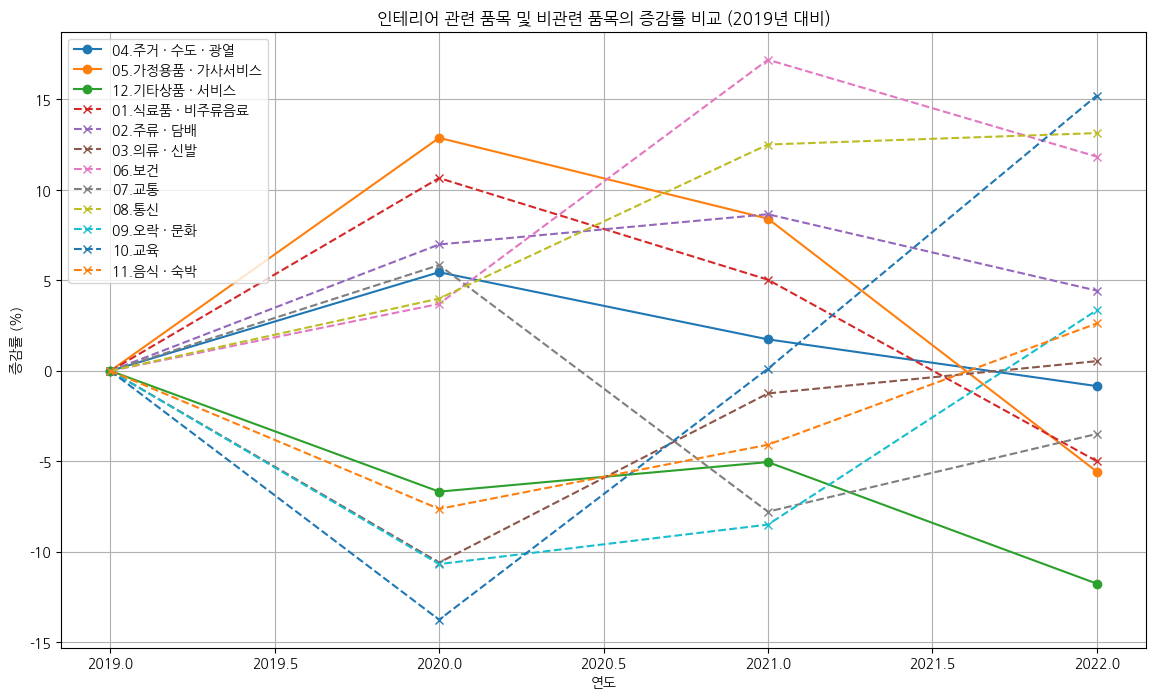

In [75]:
# 인테리어 관련 품목과 비관련 품목의 증감률 데이터 준비
interior_related = growth_rate_since_2019[['04.주거 · 수도 · 광열', '05.가정용품 · 가사서비스', '12.기타상품 · 서비스']]
non_interior_related = growth_rate_since_2019[['01.식료품 · 비주류음료', '02.주류 · 담배', '03.의류 · 신발', '06.보건', '07.교통', '08.통신', '09.오락 · 문화', '10.교육', '11.음식 · 숙박']]

# 시각화
plt.figure(figsize=(14, 8))

# 인테리어 관련 품목 시각화
for column in interior_related.columns:
    plt.plot(interior_related.index, interior_related[column], marker='o', label=column)

# 비관련 품목 시각화
for column in non_interior_related.columns:
    plt.plot(non_interior_related.index, non_interior_related[column], marker='x', linestyle='--', label=column)

plt.title('인테리어 관련 품목 및 비관련 품목의 증감률 비교 (2019년 대비)')
plt.xlabel('연도')
plt.ylabel('증감률 (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


- 펜데믹 이후 인테리어 관련 품목 소비 감소

---